# Proyek Klasifikasi Gambar: [CIFAR-10](https://www.kaggle.com/datasets/oxcdcd/cifar10)

- **Nama:** Fakhri Djamaris
- **Email:** gilingfakhri@gmail.com
- **ID Dicoding:** fakhri_djamaris


## Import Semua Packages/Library yang Digunakan


In [1]:
import tensorflow as tf

# Impor library tambahan yang mungkin diperlukan nanti
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import os
import random
import shutil
import zipfile
import requests
from PIL import Image
import pandas as pd

2025-05-25 08:39:53.380997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748162393.621034      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748162393.687287      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preparation


### Data Loading


In [2]:
# !git clone https://github.com/fakhrizamaris/proyek-akhir-ml-development.git

In [2]:
directory = '/kaggle/input/cifar10/cifar10'
train_dir = os.path.join(directory, 'train')
test_dir = os.path.join(directory, 'test')
os.listdir(directory)

['labels.txt', 'test', 'train']

### Data Preprocessing


#### Count Image


In [ ]:
base_output_dir = "/kaggle/working/proyek-akhir-ml-development/cifar10"

# Direktori baru untuk dataset gabungan
# combined_dir = os.path.join(base_output_dir, "dataset")

In [ ]:
# Buat direktori baru untuk dataset gabungan
# os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# # Salin file dan folder dari train
# for category in os.listdir(train_dir):
#     category_dir = os.path.join(train_dir, category)
#     if os.path.isdir(category_dir):
#         shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# # Salin file dan folder dari test
# for category in os.listdir(test_dir):
#     category_dir = os.path.join(test_dir, category)
#     if os.path.isdir(category_dir):
#         shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

In [ ]:
# def print_images_resolution(directory):
#     unique_sizes = set()
#     total_images = 0

#     for subdir in os.listdir(directory):
#         subdir_path = os.path.join(directory, subdir)
#         image_files = os.listdir(subdir_path)
#         num_images = len(image_files)
#         print(f"{subdir}: {num_images}")
#         total_images += num_images

#         for img_file in image_files:
#             img_path = os.path.join(subdir_path, img_file)
#             with Image.open(img_path) as img:
#                 unique_sizes.add(img.size)

#         for size in unique_sizes:
#             print(f"- {size}")
#         print("---------------")

#     print(f"\nTotal: {total_images}")

# print_images_resolution(combined_dir)

#### Labels


In [4]:
# Path ke file labels.txt
labels= '/kaggle/input/cifar10/cifar10/labels.txt' #

class_names = []
try:
    with open(labels, 'r') as f:
        class_names = [line.strip() for line in f if line.strip()]
    num_classes = len(class_names)
    print(f"Berhasil memuat label dari '{labels}'.") #
    print(f"Nama Kelas: {class_names}")
    print(f"Jumlah Kelas: {num_classes}")
except FileNotFoundError:
    print(f"Error: File '{labels}' tidak ditemukan.") #
    # Fallback jika file tidak ada (sebaiknya pastikan file ada)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Default CIFAR-10
    num_classes = len(class_names)
    print("Menggunakan class_names dan num_classes default untuk CIFAR-10.")

Berhasil memuat label dari '/kaggle/input/cifar10/cifar10/labels.txt'.
Nama Kelas: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Jumlah Kelas: 10


#### Split Dataset


In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
BATCH_SIZE = 32
SEED = 42

print("Mengumpulkan path file dan label...")
def get_filepaths_and_labels(base_directory, class_names_list):
    """Mengumpulkan semua filepath dan label (sebagai string nama kelas) dari direktori."""
    filepaths = []
    labels_str = []
    for label_name in class_names_list:
        class_dir_path = os.path.join(base_directory, label_name)
        if os.path.isdir(class_dir_path):
            for fname in os.listdir(class_dir_path):
                filepaths.append(os.path.join(class_dir_path, fname))
                labels_str.append(label_name)
    return filepaths, labels_str

# Kumpulkan data training asli dari train_dir
train_filepaths, train_labels_str = get_filepaths_and_labels(train_dir, class_names)
print(f"Ditemukan {len(train_filepaths)} gambar training dari {len(np.unique(train_labels_str))} kelas di train_dir.")

# Kumpulkan data testing asli dari test_dir
test_filepaths, test_labels_str = get_filepaths_and_labels(test_dir, class_names)
print(f"Ditemukan {len(test_filepaths)} gambar testing dari {len(np.unique(test_labels_str))} kelas di test_dir.")

# Buat DataFrame untuk data testing (akan digunakan nanti)
df_test = pd.DataFrame({'filepath': test_filepaths, 'label': test_labels_str})


Mengumpulkan path file dan label...
Ditemukan 50000 gambar training dari 10 kelas di train_dir.
Ditemukan 10000 gambar testing dari 10 kelas di test_dir.


In [6]:
print("\nMemisahkan data training dan validasi...")
X_train_paths, X_val_paths, y_train_labels_split, y_val_labels_split = train_test_split(
    train_filepaths,
    train_labels_str,
    test_size=0.2,
    random_state=SEED,
    stratify=train_labels_str
)

print(f"Jumlah data training setelah split: {len(X_train_paths)}")
print(f"Jumlah data validasi setelah split: {len(X_val_paths)}")

# Buat DataFrame untuk training dan validasi
df_train = pd.DataFrame({'filepath': X_train_paths, 'label': y_train_labels_split})
df_val = pd.DataFrame({'filepath': X_val_paths, 'label': y_val_labels_split})


Memisahkan data training dan validasi...
Jumlah data training setelah split: 40000
Jumlah data validasi setelah split: 10000


#### Show Images



Menampilkan contoh gambar dari setiap kelas pada data training (df_train):


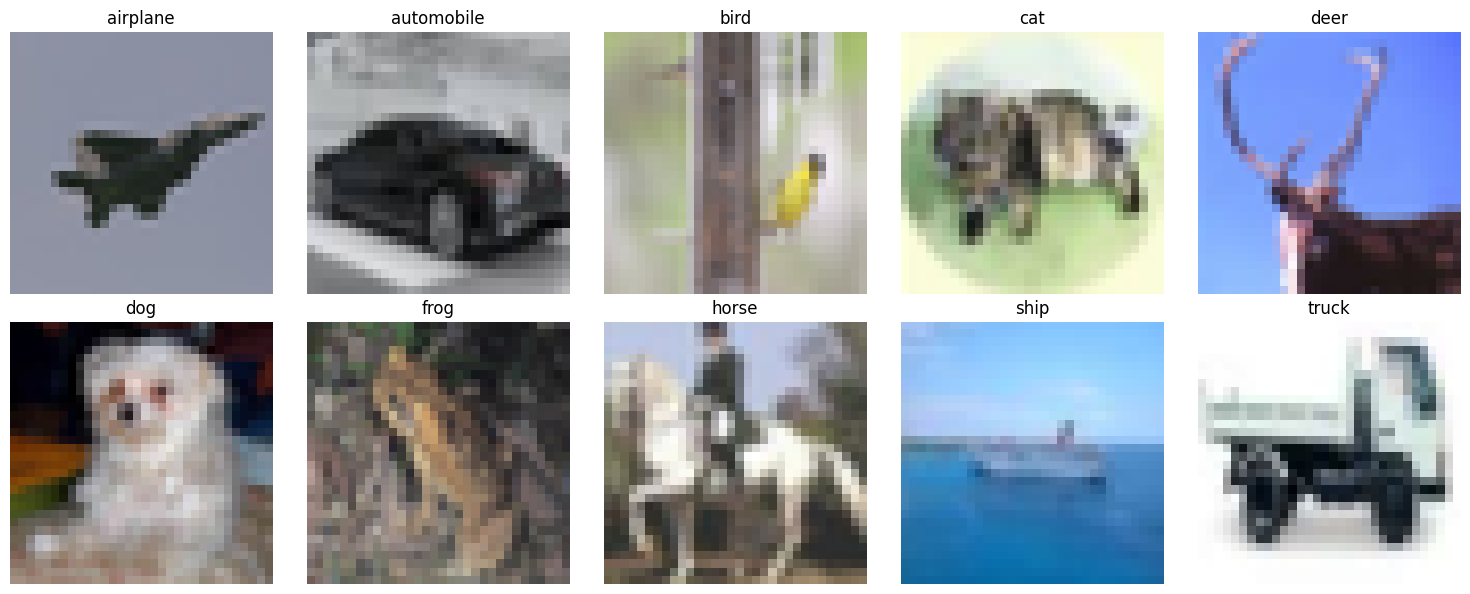

In [ ]:
print("\nMenampilkan contoh gambar dari setiap kelas pada data training (df_train):")

# Atur jumlah kolom untuk tampilan subplot
num_cols = 5
num_rows = (num_classes + num_cols - 1) // num_cols

plt.figure(figsize=(3 * num_cols, 3 * num_rows))

for i, current_class_name in enumerate(class_names):
    # Ambil satu contoh filepath untuk kelas saat ini dari df_train
    sample_image_path_series = df_train[df_train['label'] == current_class_name]['filepath']

    if not sample_image_path_series.empty:
        sample_image_path = sample_image_path_series.iloc[0] # Ambil path gambar pertama untuk kelas ini

        plt.subplot(num_rows, num_cols, i + 1)
        try:
            img = Image.open(sample_image_path)
            plt.imshow(img)
            plt.title(current_class_name)
            plt.axis('off') 
        except FileNotFoundError:
            print(f"Peringatan: Gambar tidak ditemukan di path: {sample_image_path}")
            plt.title(f"{current_class_name}\n(File Not Found)")
            plt.axis('off')
        except Exception as e:
            print(f"Peringatan: Error saat memuat gambar {sample_image_path}: {e}")
            plt.title(f"{current_class_name}\n(Error Loading)")
            plt.axis('off')
    else:
        # Jika tidak ada sampel ditemukan di df_train untuk kelas tertentu (seharusnya tidak terjadi jika stratify benar)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.text(0.5, 0.5, f"{current_class_name}\n(No Sample in df_train)", ha='center', va='center')
        plt.title(current_class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

#### Data Augmentation


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    fill_mode='nearest'
)

# ImageDataGenerator untuk validasi dan testing (hanya normalisasi)
val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Membuat Generator menggunakan flow_from_dataframe
print("\nMembuat generator data...")
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath',
    y_col='label',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    shuffle=True,
    seed=SEED
)

validation_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='filepath',
    y_col='label',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepath',
    y_col='label',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)

print("Persiapan dataset dengan ImageDataGenerator selesai.")


Membuat generator data...
Found 40000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.
Persiapan dataset dengan ImageDataGenerator selesai.


## Modelling


### Build Model


In [ ]:
model = Sequential([
    # Input Layer dengan augmentasi dan normalisasi
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Convolutional 1
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Convolutional 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Convolutional 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),

    # Fully Connected Layers
    GlobalAveragePooling2D(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1748162700.747146      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748162700.747830      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,444,650 (5.51 MB)

 Trainable params: 1,441,194 (5.50 MB)

 Non-trainable params: 3,456 (13.50 KB)

### Callbacks


In [10]:
def create_callbacks():

    callbacks = [
        # Early Stopping with more patience
        EarlyStopping(
            monitor='val_accuracy',
            patience=15,  
            restore_best_weights=True,
            verbose=1,
            min_delta=0.001  
        ),

        # Reduce Learning Rate on Plateau
        ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1,
            cooldown=2
        ),

        # Model Checkpoint
        ModelCheckpoint(
            'best_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            save_weights_only=False,
            verbose=1,
            mode='max'
        ),
    ]

    return callbacks

### Train Model


In [11]:
epochs = 100 

# Create the callbacks
model_callbacks = create_callbacks()

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=model_callbacks,
    verbose=1
)

# Simpan model Keras yang sudah dilatih
model_keras_filename = 'model.keras'
model.save(model_keras_filename)
print(f"Model Keras disimpan sebagai {model_keras_filename}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1748162722.471375     102 service.cc:148] XLA service 0x798bd000e240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748162722.472446     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748162722.472465     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748162723.447231     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/1250 ━━━━━━━━━━━━━━━━━━━━ 1:16 61ms/step - accuracy: 0.1059 - loss: 3.7746  

I0000 00:00:1748162731.441988     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.2504 - loss: 2.3807
Epoch 1: val_accuracy improved from -inf to 0.48950, saving model to best_model.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 134ms/step - accuracy: 0.2504 - loss: 2.3804 - val_accuracy: 0.4895 - val_loss: 1.3998 - learning_rate: 0.0010
Epoch 2/100
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4845 - loss: 1.4423
Epoch 2: val_accuracy did not improve from 0.48950
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 60ms/step - accuracy: 0.4846 - loss: 1.4422 - val_accuracy: 0.4796 - val_loss: 1.6142 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5702 - loss: 1.2247
Epoch 3: val_accuracy improved from 0.48950 to 0.66010, saving model to best_model.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.5702 - loss: 1.2247 - val_accuracy: 0.6601 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6173 - loss: 1

## Evaluasi dan Visualisasi


### Evaluasi


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9008 - loss: 0.3167
Validation Accuracy: 0.90
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.95      0.89      0.92      1000
  automobile       0.94      0.94      0.94      1000
        bird       0.90      0.88      0.89      1000
         cat       0.86      0.71      0.78      1000
        deer       0.91      0.90      0.90      1000
         dog       0.85      0.81      0.83      1000
        frog       0.81      0.97      0.89      1000
       horse       0.92      0.95      0.93      1000
        ship       0.95      0.96      0.96      1000
       truck       0.89      0.96      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



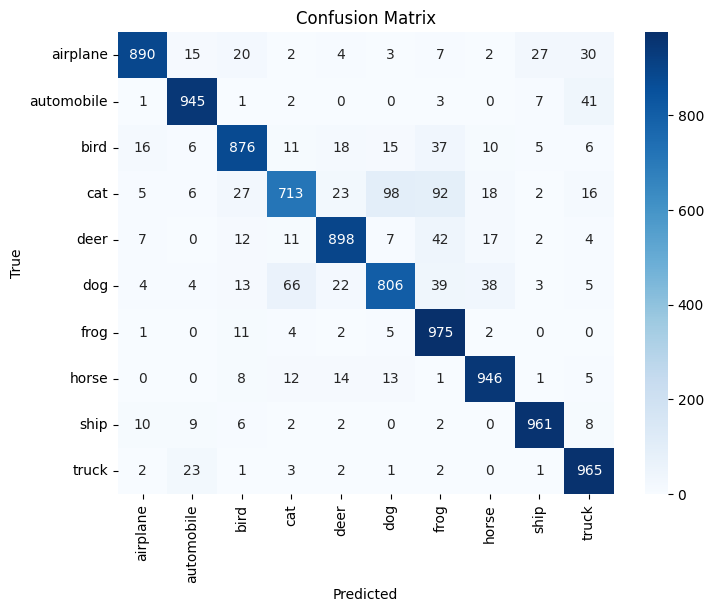

In [14]:
# Evaluasi akurasi pada data validasi
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

# Prediksi
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt="d", 
            xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


### Visualisasi


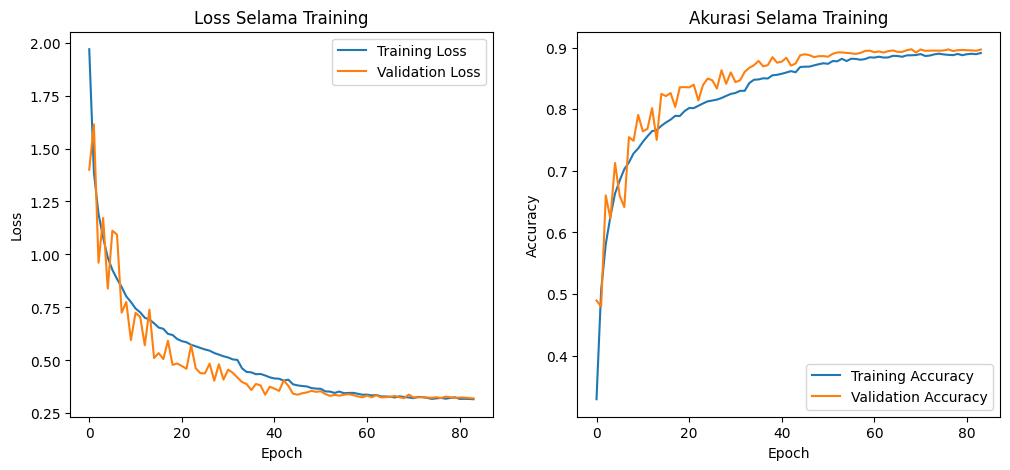

In [28]:
# Visualisasi loss (training dan validation)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi (training dan validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


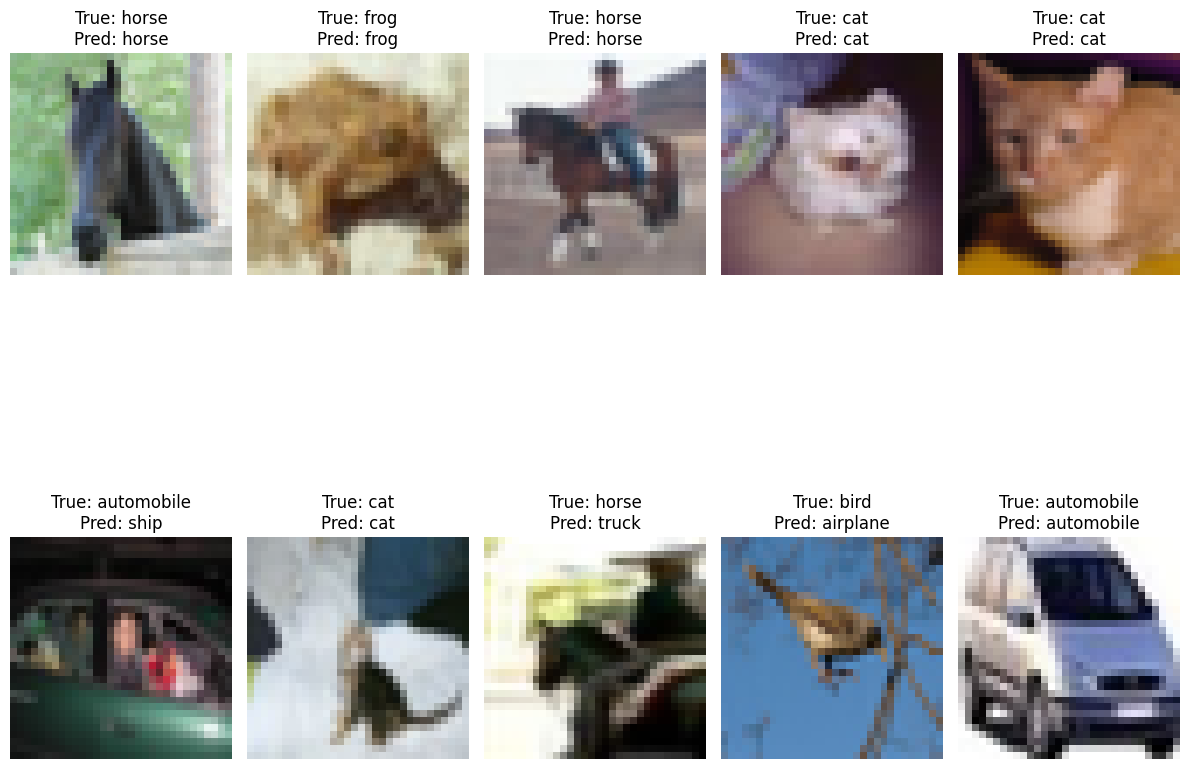

In [19]:
def visualize_predictions(model, data_gen, class_labels, num_images=10):
    images, labels = next(data_gen)
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx])
        plt.axis("off")
        plt.title(f"True: {class_labels[true_classes[idx]]}\nPred: {class_labels[pred_classes[idx]]}")
    plt.tight_layout()
    plt.show()

visualize_predictions(model, validation_generator, class_labels)


## Konversi Model


### saved_model


In [20]:
# SavedModel format
path = "saved_model/"
tf.saved_model.save(model, path)

### tflite


In [ ]:
# Buat folder "tflite" jika belum ada
os.makedirs("tflite", exist_ok=True)

# Konversi model.keras ke tflite
model = tf.keras.models.load_model("model.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#Simpan model.tflite
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

#Simpan label.txt
with open("tflite/label.txt", "w") as f:
    for label in class_names:
        f.write(f"{label}\n")

print("model.tflite dan label.txt berhasil disimpan di folder 'tflite'")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 44 variables whereas the saved optimizer has 86 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saved artifact at '/tmp/tmpmzqxruvn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133641332311632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388805968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388806352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388806544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388804624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388805776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388808080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388808656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388808848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388807696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133641388806160:

W0000 00:00:1748169894.635960      35 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1748169894.635998      35 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


### tfjs_model


In [22]:
!pip install tensorflowjs

# Jalankan konversi
!tensorflowjs_converter --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    saved_model/ tfjs_model/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible

## Inference (Optional)


### Inference dengan model tflite


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


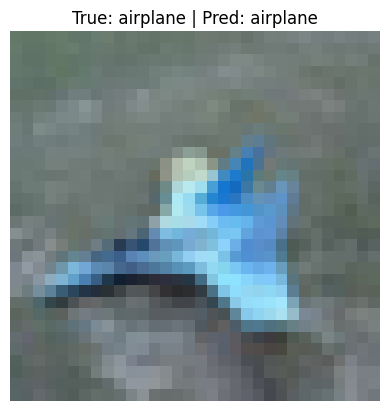

In [ ]:
def predict_tflite_image(model_path, test_generator, class_labels):
    # Ambil satu batch
    images, labels = next(test_generator)
    idx = np.random.randint(0, len(images))
    img = images[idx]
    true_class = np.argmax(labels[idx])

    # Load model TFLite
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Dapatkan detail input dan output
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Siapkan input
    input_data = np.expand_dims(img, axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Jalankan inference
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    pred_class = np.argmax(output_data)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {class_labels[true_class]} | Pred: {class_labels[pred_class]}")
    plt.show()

# Contoh penggunaan
predict_tflite_image("tflite/model.tflite", test_generator, class_labels)